<h1>Youtube Views Prediction</h1><br>
    Memprediksi penonton (<i>views</i>) pada video youtube

<h2> Tentang Dataset</h2><br>
- <b>trending_date:</b> tanggal ketika video trending<br>
- <b>title:</b> judul video<br>
- <b>channel_title:</b> nama channel<br>
- <b>category_id:</b> kategori video dalam label encoding<br>
- <b>publish_time:</b> waktu publish video<br>
- <b>tags:</b> tag yang digunakan pada video<br>
- <b>views:</b> jumlah views video<br>
- <b>likes:</b> jumlah likes video<br>
- <b>dislikes:</b> jumlah dislikes video<br>
- <b>comment_count:</b> jumlah komentar pada video<br>
- <b>comments_disabled:</b> apakah status komentar dinonaktifkan pada video<br>
- <b>ratings_disabled:</b> apakah rating dinonaktifkan pada video<br>
- <b>video_error_or_removed:</b> apakah video error atau sudah dihapus saat ini<br>
- <b>description:</b> deskripsi video<br>
- <b>No_tags:</b> jumlah tags yang digunakan<br>
- <b>desc_len:</b> panjang kata deskripsi video<br>
- <b>len_title:</b> panjang kata judul video<br>
- <b>publish_date:</b> tanggal publish video<br>

<h2>Pertama - Identifikasi Data</h2></br>
Langkah awal yang dilakukan adalah mengidentifikasi data, menentukan variabel dependen (target) dengan independen (bebas) dan memeriksa apakah dalam data tersebut sudah bersih atau masih ada data yang kosong.

In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [4]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d')

In [5]:
#Mendeteksi baris yang kosong
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [6]:
df = df.dropna(subset=['description'])

In [7]:
df.duplicated().sum()

4228

In [8]:
df = df.drop_duplicates()

In [9]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


Setelah data diperiksa, ada beberapa temuan awal yang didapatkan diantaranya sebagai berikut:<br>
1. <b>Variabel Dependen</b> dari data tersebut adalah views dimana luaran dari kolom tersebut adalah banyaknya penonton pada video tersebut.
2. <b>Variabel Independen</b> dari data tersebut adalah 'title','channel_title','tags','description','comments_disabled','ratings_disabled','video_error_or_removed','likes','dislikes','No_tags','desc_len','len_title'.<br>
3. Terdapat perbedaan tipe data pada kolom trending_date dimana tipe awalnya adalah object kemudian dirubah menjadi datetype. Selain itu, category_id dirubah dari integer menjadi object<br>
4. Terdapat 45 baris kosong dan 4228 duplikasi data, sehingga kita drop

<h2>Kedua - Mendeskripsikan & Mengelompokkan Data</h2><br>
Fungsi dari mendeskripsikan dan mengelompokkan data sangat penting dalam analisis data, terutama dalam konteks pengambilan keputusan yang berbasis data. Hal ini bertujuan untuk memberikan gambaran umum tentang data yang ada, termasuk seberapa besar variabilitas, sebaran, dan tren yang terlihat. Selain itu, untuk memisahkan data ke dalam beberapa kelompok sehingga setiap kelompok memiliki sifat atau karakteristik yang mirip.

In [10]:
round(df.describe(), 2)

,trending_date,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,32518,32518.00,3.251800e+04,32518.00,32518.00,32518.00,32518.00,32518.0,32518.00,32518
mean,2018-02-19 03:24:03.409803520,21.60,1.007332e+06,25973.09,1598.09,2562.14,18.86,911.4,71.00,2018-02-17 00:41:16.314656512
min,2017-11-14 00:00:00,1.00,4.024000e+03,0.00,0.00,0.00,1.00,3.0,5.00,2017-05-27 00:00:00
25%,2017-12-28 00:00:00,23.00,1.142148e+05,800.00,99.00,74.00,12.00,365.0,54.00,2017-12-25 00:00:00
50%,2018-02-14 00:00:00,24.00,2.779045e+05,2822.00,294.00,306.50,19.00,673.0,75.00,2018-02-12 00:00:00
75%,2018-04-14 00:00:00,24.00,7.394835e+05,12330.75,944.75,1190.00,25.00,1222.0,91.00,2018-04-12 00:00:00
max,2018-06-14 00:00:00,43.00,1.254322e+08,2912710.00,1545017.00,827755.00,72.00,5136.0,100.00,2018-06-13 00:00:00
std,NaN,6.53,3.172604e+06,97255.60,17042.37,14893.50,9.87,805.8,22.29,NaN


In [11]:
#pengelompokan data berdasarkan jenisnya
#cats = data kategori
#nums = data numerik
cats=['title','channel_title','tags','description','comments_disabled','ratings_disabled','video_error_or_removed']
nums=['views','likes','dislikes','comment_count','No_tags','desc_len','len_title']

In [12]:
#Mendeskripsikan data kategori
df[cats].describe(include='all')

,title,channel_title,tags,description,comments_disabled,ratings_disabled,video_error_or_removed
count,32518,32518,32518,32518,32518,32518,32518
unique,16402,1390,12452,13979,2,2,2
top,Nandhini | Today @ 9 pm | Sun TV,VikatanTV,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,False,False,False
freq,15,208,1027,150,31434,31829,32509


In [13]:
#Mendeskripsikan data kategori berdasarkan tiap kolom
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom title:
title
Nandhini | Today @ 9 pm | Sun TV                                                             15
Mission: Impossible - Fallout (2018) - Official Trailer - Paramount Pictures                 14
Sanju | Official Teaser | Ranbir Kapoor | Rajkumar Hirani                                    13
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                            12
School Ke Wo Din - Amit Bhadana                                                              11
                                                                                             ..
Hey Jude Malayalam Movie Review By #AbhijithVlogger                                           1
Naa Show Naa Ishtam | 3rd February 2018| Full Episode 117 | Dhee 10 pandu&Raju | ETV Plus     1
Manasu Mamata | 3rd February 2018 |Full Episode No 2196| ETV Telugu                           1
Jethalal Awards Tappu For His Bad work | Taarak Mehta Ka Ooltah Chashmah                      1
Rusev vs.

In [14]:
#Mendeskripsikan data numerik
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.251800e+04,3.251800e+04,3.251800e+04,32518.000000,32518.000000,32518.000000,32518.000000
mean,1.007332e+06,2.597309e+04,1.598092e+03,2562.143459,18.857095,911.403592,70.998862
std,3.172604e+06,9.725560e+04,1.704237e+04,14893.497092,9.865278,805.796673,22.287741
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.142148e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,365.000000,54.000000
50%,2.779045e+05,2.822000e+03,2.940000e+02,306.500000,19.000000,673.000000,75.000000
75%,7.394835e+05,1.233075e+04,9.447500e+02,1190.000000,25.000000,1222.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


Berdasarkan deskripsi data diatas, didapatkan beberapa insight sebagai berikut:<br><br>
<b> Analisis Data Kategorik</b><br>
- Judul <b>Nandhini | Today @ 9 pm | Sun TV</b> paling sering muncul dengan 15 kali<br>
- Chanel Youtube <b>VikatanTV</b> paling sering muncul dengan 208 kali<br>
- Terdapat 1028 video tidak memiliki <b>Tags</b><br>
- Berdasarkan pembukaan kolom komentar<br>
    a 1084 video memilih untuk <b>mematikan</b> kolom komentarnya<br>
    b 31434 video memilih untuk <b>menyalakan</b> kolom komentarnya<br>
- Berdasarkan pembukaan kolom rating<br>
    a 689 video memilih untuk <b>mematikan</b> ratingnya<br>
    b 31829 video memilih untuk <b>menyalakan</b> ratingnya<br>
- Berdasarkan ketersediaan video saat ini<br>
    a. 9 video sudah <b>dihapus/tidak tersedia</b><br>
    b. 32509 video masih <b>tersedia</b>
    
<b> Analisis Data Numerikal</b><br>
- Rata-Rata video ditonton <b>1.007.332 kali</b><br>
- Sebuah video paling sedikit ditonton sebanyak <b>4.024 kali</b><br>
- Sebuah video paling sering ditonton sebanyak <b>125.432.200 kali</b><br><br>

- Rata-Rata video disukai oleh <b>25.973 penonton</b><br>
- Ada video yang sama sekali <b>tidak mendapatkan like</b> oleh penonton<br>
- Ada video memiliki jumlah disukai paling banyak yaitu <b>2.912.710 penonton</b><br><br>

- Rata-Rata video tidak disukai oleh <b>1.598 penonton</b><br>
- Ada video yang sama sekali <b>tidak mendapatkan dislike</b> oleh penonton<br>
- Ada video memiliki jumlah tidak disukai paling banyak yaitu <b>1.545.017 penonton</b><br><br>

- Rata-Rata video tidak ditambahkan tags sejumlah <b>18 video</b><br>
- Setiap video <b>pasti disertakan</b> minimal <b>1 tag</b><br>
- Jumlah tag <b>paling banyak</b> dalam satu video yaitu <b>72 tag</b><br><br>

- Rata-Rata penonton memberikan komentar sebanyak <b>2526 komentar</b><br>
- Ada video yang sama sekali<b> tidak beri komentar apapun</b><br>
- Jumlah komentar <b>paling banyak</b> dalam satu video yaitu <b>827.755 komentar</b><br><br>

- Setiap video memiliki rata-rata deskripsi <b>911 huruf</b><br>
- Setiap video memiliki paling sedikit <b>3 huruf deskripsi</b><br>
- Ada satu video memiliki deskripsi paling banyak yaitu sebanyak <b>5136 huruf</b><br><br>

- Setiap video memiliki rata-rata judul <b>70 huruf</b><br>
- Setiap video memiliki judul paling sedikit <b>3 huruf</b><br>
- Ada satu video memiliki judul paling banyak yaitu sebanyak <b>100 huruf</b>

<h2>Ketiga - Analisis Data</h2><br>
Analisis Data dilakukan dengan melakukan pendekatan grafik. Analisis yang dilakukan terbagi menjadi 2, yaitu:<br>

1. <b> Unvariat Analysis</b> dianalisis dengan 3 plot, yaitu:<br>
    a. <b>Violin & Box Plot</b> untuk melihat apakah setiap variabel memiliki data outlier atau tidak<br>
    b. <b>Density Plot</b> untuk melihat distribusi data apakah normal atau tidak<br>
2. <b>Multivariate Analysis</b> dianalisis dengan 2 plot, yaitu:<br>
    a. <b>Heatmap</b> untuk representasi visual dari korelasi antara berbagai variabel.<br>
    b. <b>Pair Plot</b> untuk memberikan gambaran menyeluruh tentang hubungan antar variabel dalam dataset.

<h3>1. Unvariat Analysis

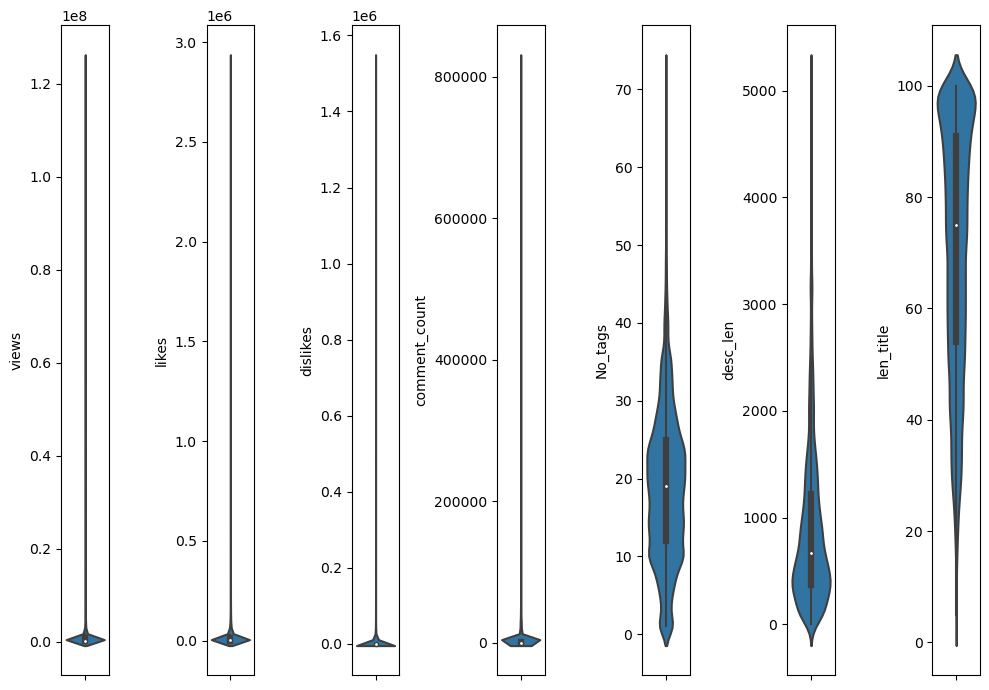

In [15]:
# Univariate Analysis menggunakan Violin Plot

plt.figure(figsize=(10,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

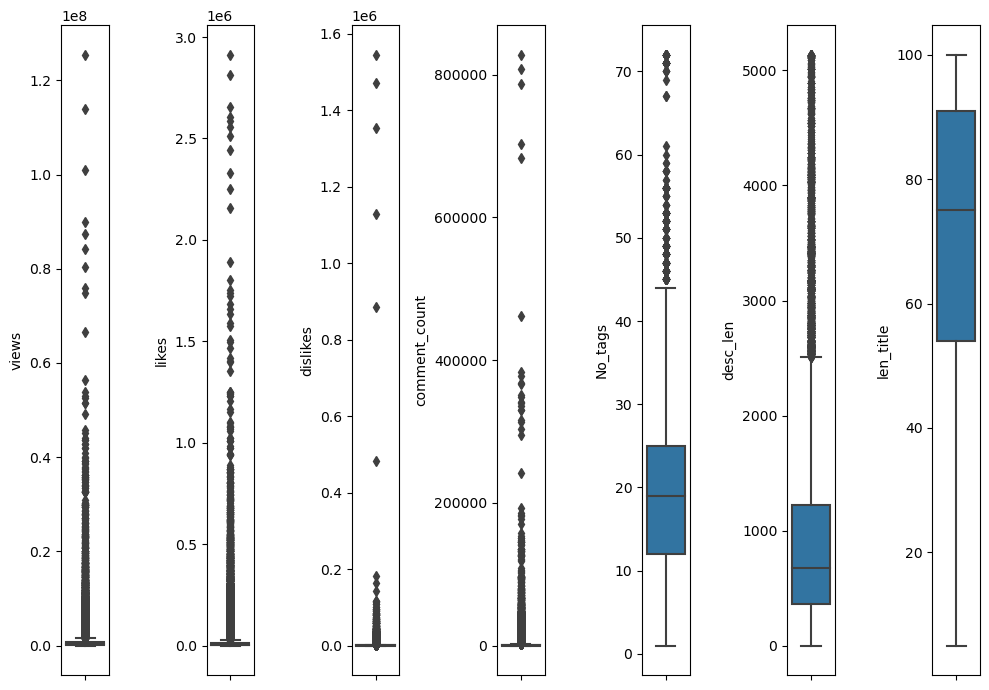

In [16]:
# Univariate Analysis menggunakan boxplot

plt.figure(figsize=(10,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Berdasarkan Box Plot dan Violin Plot, didapatkan beberapa insight sebagai berikut:
1. Sebagian besar plot menunjukkan distribusi data yang tidak simetris, dengan banyak titik data terkonsentrasi di ujung bawah dan beberapa outlier di ujung atas. Ini menunjukkan bahwa sebagian besar data memiliki nilai yang relatif rendah, sementara hanya sedikit data yang memiliki nilai yang sangat tinggi.
2. Plot "Views","Likes"dan "comment_count" memiliki outlier yang sangat ekstrem di ujung atas, yang menunjukkan adanya beberapa video atau postingan yang sangat populer.
3. Plot "No_Tags", "desc_len", dan "len_title" memiliki distribusi yang lebih terpusat, dengan rentang nilai yang lebih sempit.
4. Secara umum, jumlah "Views" dan "Likes" cenderung lebih tinggi dibandingkan dengan variabel lainnya. Ini menunjukkan bahwa popularitas video atau postingan sangat bervariasi, dengan beberapa konten yang sangat populer dan banyak lainnya yang kurang populer.
5. Jumlah "Dislikes" umumnya lebih rendah dibandingkan dengan "Likes", yang menunjukkan bahwa sebagian besar konten diterima dengan baik oleh pengguna.
6. Variabel "No_Tags", "desc_len", dan "len_title" tampaknya tidak memiliki korelasi yang jelas dengan jumlah "Views" atau "Likes".

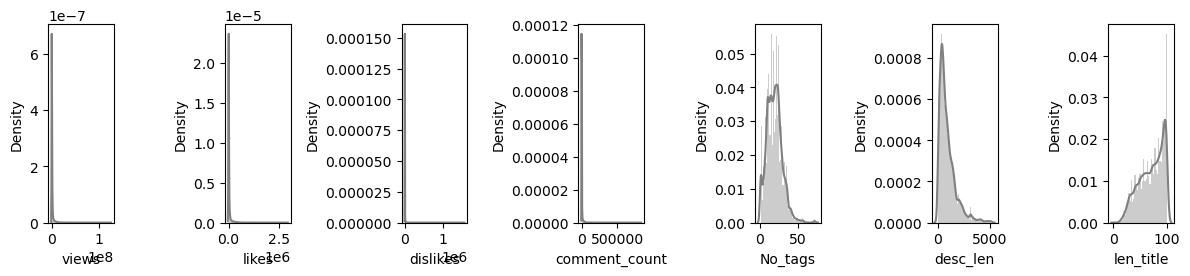

In [17]:
#Unvariat Analysis dengan Density Plot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Berdasarkan Density Plot, didapatkan beberapa insight sebagai berikut:
1. Sebagian besar grafik menunjukkan positive skew atau miring ke kanan. Artinya, sebagian besar data terkonsentrasi di sisi kiri (nilai yang lebih rendah), dengan sedikit data yang memiliki nilai sangat tinggi di sisi kanan (outlier). Ini mengindikasikan bahwa ada beberapa data yang memiliki nilai jauh di atas rata-rata.
2. Sebagian besar konten memiliki jumlah views, likes, dan dislikes yang relatif rendah.
3. Ada sedikit sekali konten yang sangat populer (views, likes, dislikes,comment_count yang sangat tinggi). Ini menunjukkan fenomena "long tail" yang sering terjadi pada data media sosial, di mana sebagian besar konten memiliki popularitas yang rendah, sementara sedikit konten menjadi sangat populer.
4. Distribusi jumlah tag cenderung terpusat di sekitar nilai tertentu, dengan sedikit variasi.
5. Panjang deskripsi dan judul juga menunjukkan distribusi yang cenderung terpusat, meskipun dengan sedikit lebih banyak variasi dibandingkan dengan jumlah tag.

<h3>2. Multivariate Analysis

<Axes: >

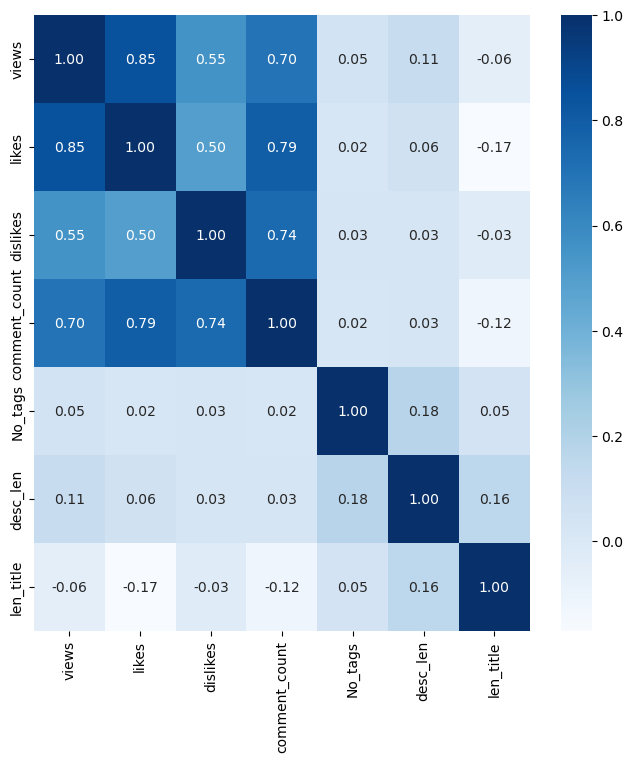

In [18]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
numeric_df = df[nums].select_dtypes(include='number')
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 10})

<Figure size 1500x1500 with 0 Axes>

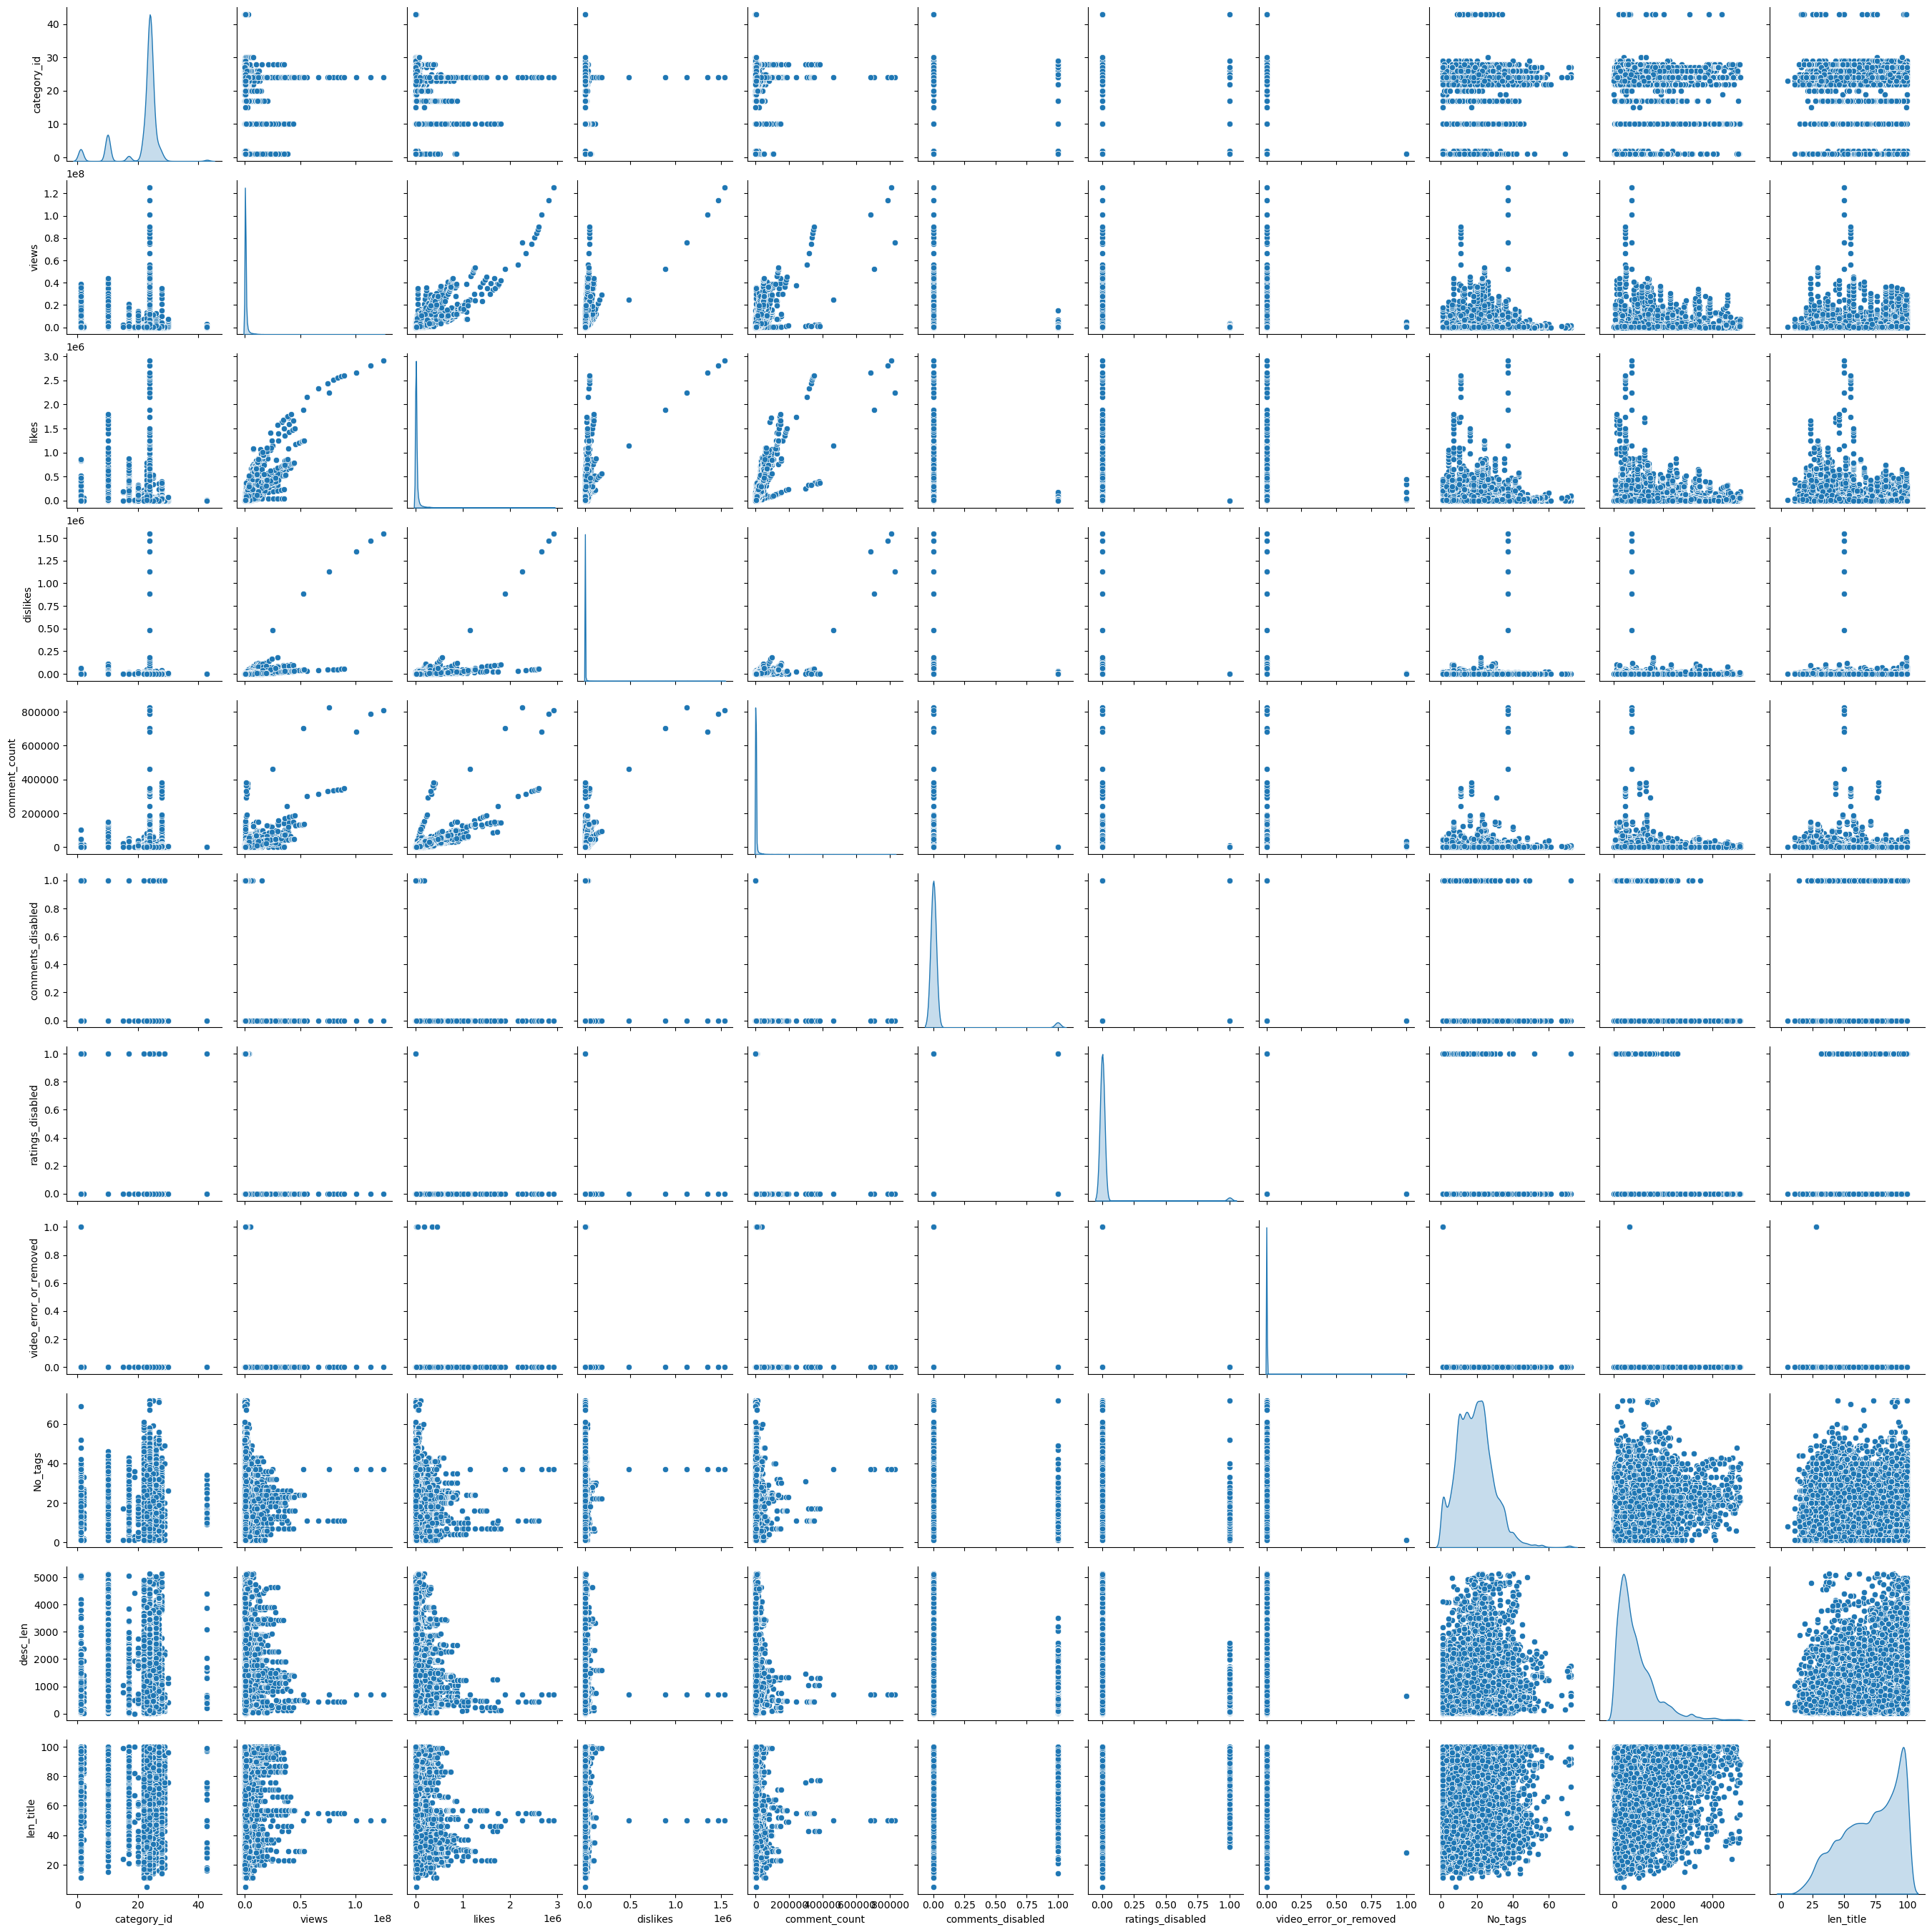

In [19]:
# Pairplot untuk melihat secara visual apakah ada pola yang terbentuk dari interaksi 2 kolom numerik
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

Berdasarkan Heatmap & Pairplot diatas, didapatkan beberapa insight sebagai berikut:
1. <b>Korelasi Positif Kuat</b><br>
Hubungan antara <b>Views</b> dengan <b>likes, dislikes, dan comment_count:</b> Variabel-variabel ini memiliki korelasi positif yang sangat kuat satu sama lain. Artinya, ketika salah satu variabel meningkat, variabel lainnya cenderung juga meningkat. Ini menunjukkan antara hubungan yang kuat antara likes dan comment_count, serta dislikes dan comment_count, menunjukkan bahwa video dengan lebih banyak engagement (baik positif maupun negatif) cenderung memiliki lebih banyak views.<br>
2. <b>Korelasi Positif Lemah:</b><br>
<b>No_tags, desc_len, dan len_title:</b> Variabel-variabel ini memiliki korelasi positif yang sangat lemah dengan variabel lainnya. Artinya, jumlah tag, panjang deskripsi, dan panjang judul tidak terlalu berpengaruh pada jumlah views, likes, dislikes, atau comment_count.<br>
3. <b>Likes, comment_count, dan dislikes</b> semuanya memiliki korelasi yang signifikan dengan jumlah views, dengan likes menjadi yang paling kuat. Ketiga fitur ini penting untuk model prediksi views.

<h2>Keempat - Handle Outlier</h2><br>
Handle outlier atau menangani outlier merupakan langkah penting dalam analisis data, terutama dalam konteks statistika dan machine learning. Outlier adalah titik data yang menyimpang jauh dari mayoritas data lainnya, dan dapat disebabkan oleh berbagai faktor seperti kesalahan pengukuran atau kondisi khusus yang memang berbeda dari data lain. Tujuan dari handle outlier adalah untuk Meningkatkan Akurasi Model, Mendeteksi Kesalahan Data, Menghindari Kesimpulan yang Menyesatkan dan Memastikan Kualitas Data. Langkah untuk menangani outlier adalah sebagai berikut:<br>
1. Transformasi data dengan Transformasi Logaritma<br>
2. Menghapus Outlier dengan Z-Score

<h3>1. Transformasi Logaritma

In [20]:
df[nums] = np.log(df[nums] + (df[df[nums] > 0][nums].min() / 2))

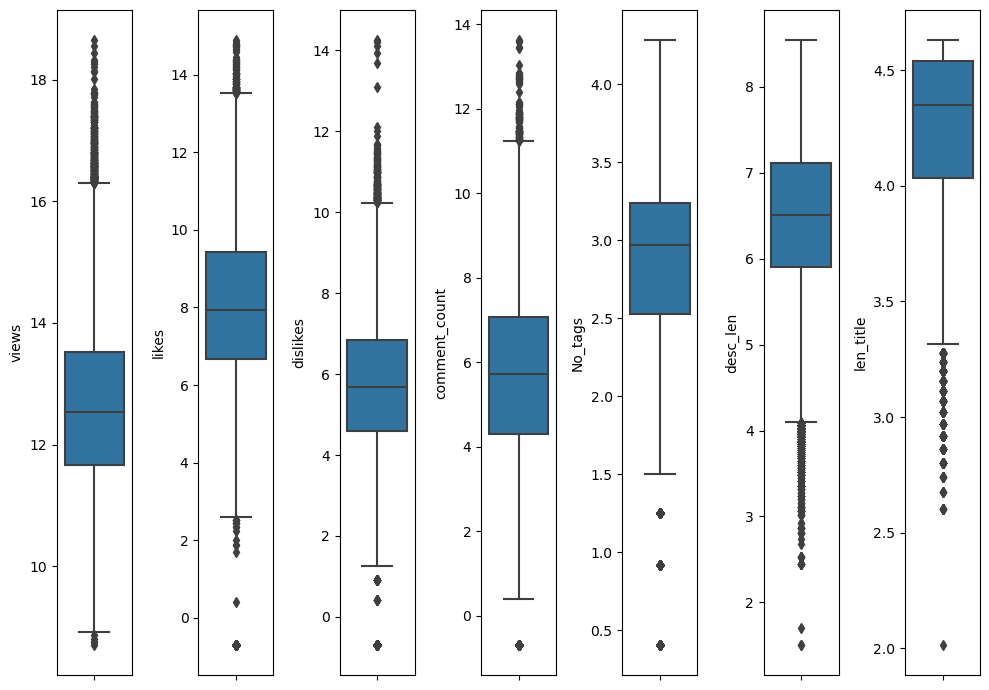

In [21]:
# Univariate Analysis menggunakan boxplot

plt.figure(figsize=(10,7))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

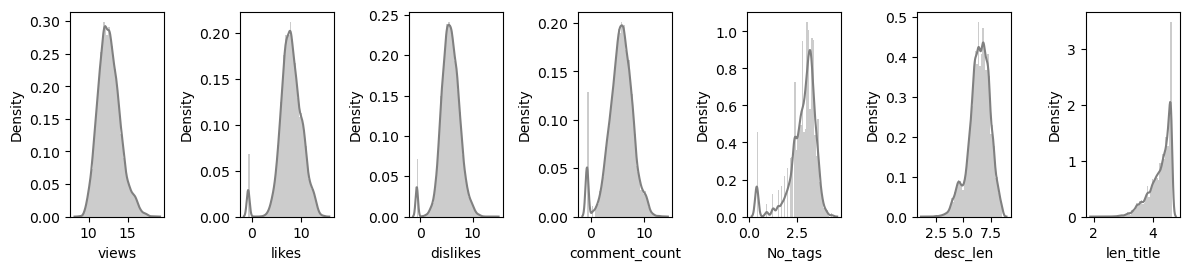

In [22]:
#Unvariat Analysis dengan Density Plot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

Setelah dilakukan transformasi logaritma, hampir semua feature mendekati distribusi normal

<h3>2. Z-Score

In [23]:
from scipy import stats

print("Before removing outlier: ", len(df))

for num in nums:

    z_scores = np.abs(stats.zscore(df[num]))
    df = df[z_scores <= 3]

print("After removing outlier: ", len(df))

Before removing outlier:  32518
After removing outlier:  30125


Setelah dilakukan metode Z-Score, terdapat 2.663 data berhasil dibuang dari yang semula 36791 data menjadi 34128 data.

<h2> Keenam - Feature Extraction</h2>

Merupakan fitur tambahan yang diharapkan untuk mendapatkan fitur baru yang akan di train juga. Untuk mendapatkan Feature Extraction, maka kita dapat mengexplore dari database yang sudah ada. Ada beberapa Freature yang dapat diextraction, diantaranya:<br>
1. <b>Time to Trending</b><br>
Fitur ini menghitung berapa lama waktu yang dibutuhkan dari saat video dipublikasikan hingga menjadi trending. Semakin cepat sebuah video masuk trending, semakin besar popularitas video tersebut dalam waktu singkat.<br>
2. <b>Engangement Rate (%)</b><br>
Nilai ini menggambarkan seberapa banyak penonton yang berinteraksi dengan video (melalui likes, dislikes, atau komentar) dibandingkan dengan jumlah total penonton. Semakin tinggi engagement rate, semakin besar interaksi video tersebut.<br>
3. <b>Social Activity</b><br>
Ini menunjukkan total interaksi sosial di video, termasuk semua likes, dislikes, dan komentar. Semakin tinggi aktivitas sosial, semakin besar interaksi yang dihasilkan oleh video tersebut.<br>
4. <b>Video Category</b><br>
Fitur ini mengkategorikan video berdasarkan jenis konten yang dipublikasikan (misalnya: Film & Animasi, Berita & Politik, Hiburan, dll.).<br>
5. <b>Waktu Publikasi</b><br>
Merupakan pengelompokkan video berdasarkan waktu publikasi per jam<br>
    

<h3>1. Time to Trending

In [24]:
# Ubah kolom trending_date dan publish_date ke dalam format datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d')
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')

# Hitung time_to_trending sebagai selisih antara trending_date dan publish_date
df['time_to_trending'] = (df['trending_date'] - df['publish_date']).dt.days

# Cek hasilnya
df[['trending_date', 'publish_date', 'time_to_trending']].head()

,trending_date,publish_date,time_to_trending
0,2017-11-14,2017-11-12,2
1,2017-11-14,2017-11-13,1
2,2017-11-14,2017-11-12,2
3,2017-11-14,2017-11-12,2
4,2017-11-14,2017-11-13,1


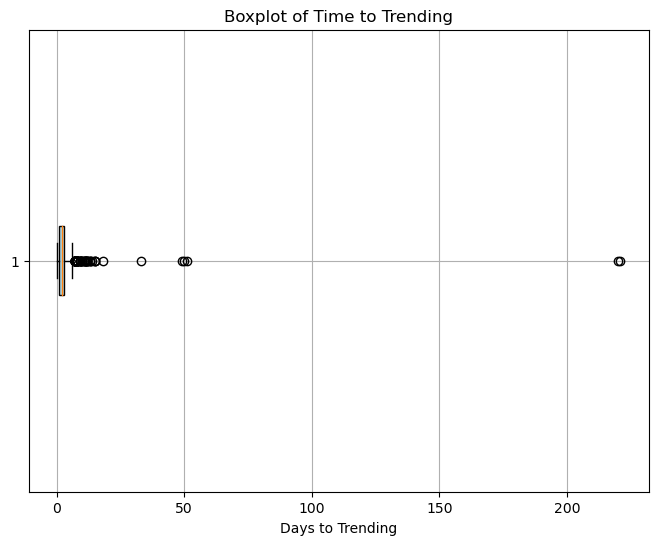

In [25]:
plt.figure(figsize=(8,6))
plt.boxplot(df['time_to_trending'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Time to Trending')
plt.xlabel('Days to Trending')
plt.grid(True)
plt.show()

<h3>2. Engangement Rate

In [26]:
# Menghitung engagement rate
df['engagement_rate'] = ((df['likes'] + df['dislikes'] + df['comment_count']) / df['views']) * 100

# Cek hasilnya
df[['views', 'likes', 'dislikes', 'comment_count', 'engagement_rate']].head()

,views,likes,dislikes,comment_count,engagement_rate
0,13.909310,10.433130,6.682735,6.782759,171.817470
1,13.291453,6.600551,6.807382,-0.693147,95.661369
2,13.073173,7.606636,5.495117,5.007296,138.520688
3,14.034399,11.161288,7.392955,7.895250,188.461890
4,13.051999,6.199494,5.681878,4.197202,123.188595


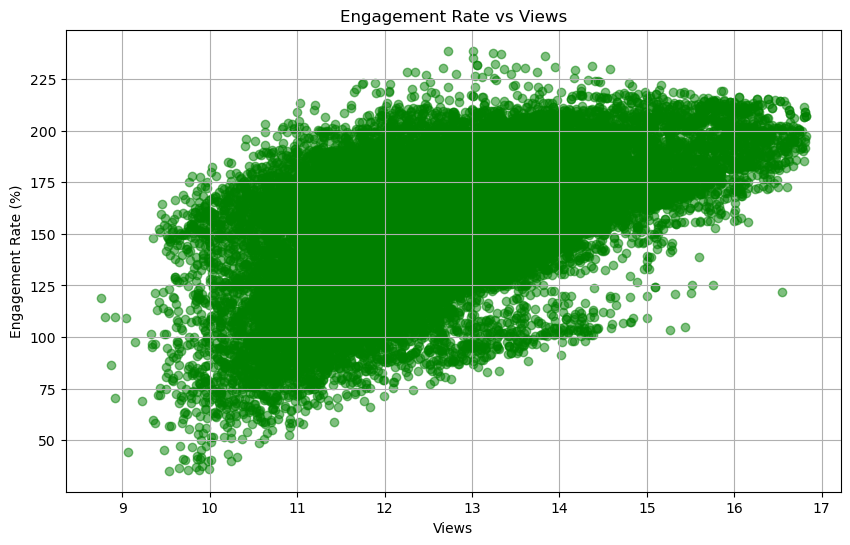

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(df['views'], df['engagement_rate'], color='green', alpha=0.5)
plt.title('Engagement Rate vs Views')
plt.xlabel('Views')
plt.ylabel('Engagement Rate (%)')
plt.grid(True)
plt.show()

<h3>3. Social Activity

In [28]:
# Menghitung total aktivitas sosial sebagai jumlah dari likes, dislikes, dan comments
df['social_activity'] = df['likes'] + df['dislikes'] + df['comment_count']

# Cek hasilnya
df[['likes', 'dislikes', 'comment_count', 'social_activity']].head()

,likes,dislikes,comment_count,social_activity
0,10.433130,6.682735,6.782759,23.898624
1,6.600551,6.807382,-0.693147,12.714786
2,7.606636,5.495117,5.007296,18.109049
3,11.161288,7.392955,7.895250,26.449493
4,6.199494,5.681878,4.197202,16.078574


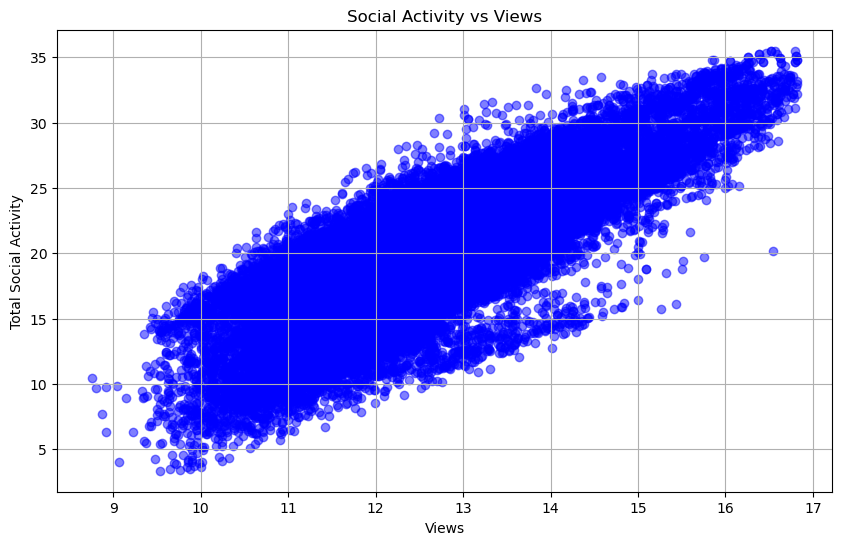

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(df['views'], df['social_activity'], color='blue', alpha=0.5)
plt.title('Social Activity vs Views')
plt.xlabel('Views')
plt.ylabel('Total Social Activity')
plt.grid(True)
plt.show()

<h3>4. Video Category

In [30]:
# Dictionary untuk mapping category_id ke nama kategori
category_mapping = {
    1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals',
    17: 'Sports', 19: 'Travel & Events', 20: 'Gaming', 22: 'People & Blogs',
    23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style',
    27: 'Education', 28: 'Science & Technology'
}

# Mapping category_id ke nama kategori
df['category_name'] = df['category_id'].map(category_mapping)

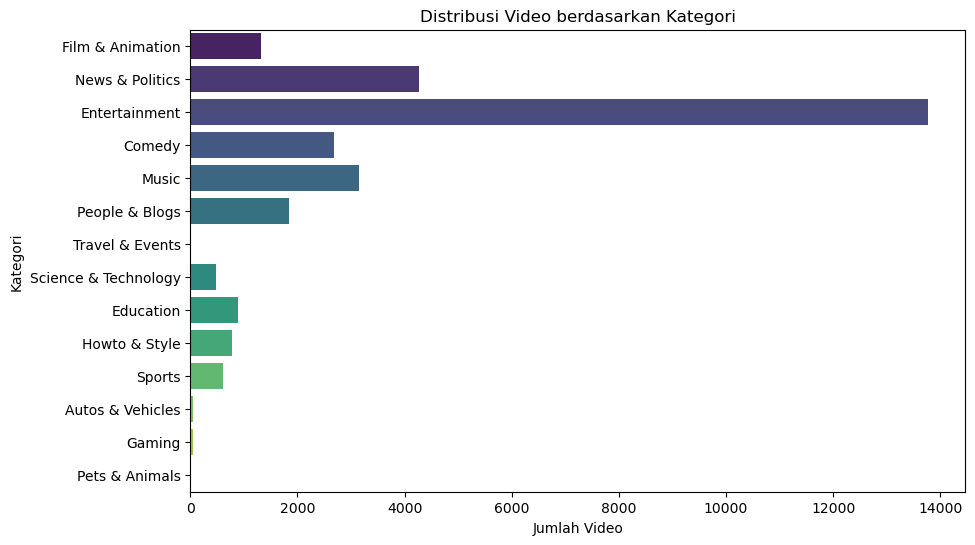

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category_name', data=df, palette='viridis')
plt.title('Distribusi Video berdasarkan Kategori')
plt.xlabel('Jumlah Video')
plt.ylabel('Kategori')
plt.show()

<h3>5. Waktu Publikasi

In [32]:
# Pastikan publish_time dalam format datetime yang sesuai
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S')

# Memisahkan waktu menjadi fitur jam, hari, bulan, dan tahun
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day
df['publish_month'] = df['publish_time'].dt.month
df['publish_year'] = df['publish_time'].dt.year

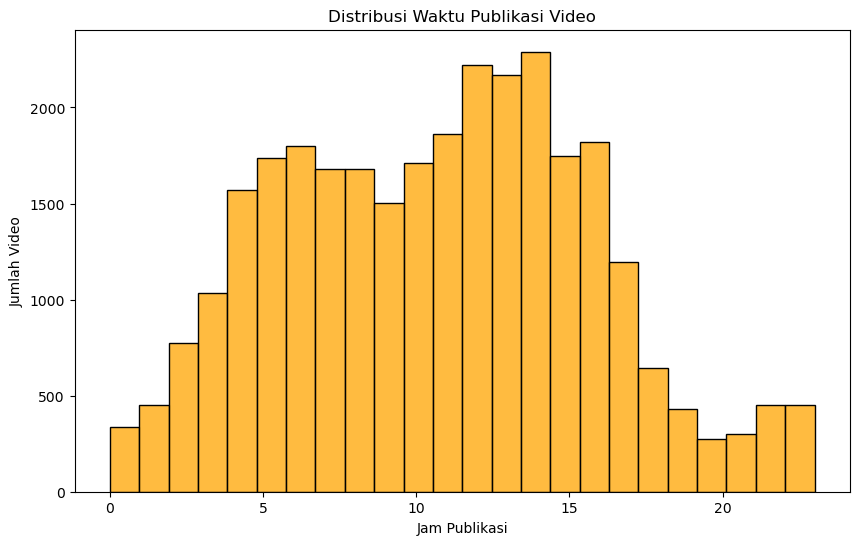

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['publish_hour'], bins=24, kde=False, color='orange')
plt.title('Distribusi Waktu Publikasi Video')
plt.xlabel('Jam Publikasi')
plt.ylabel('Jumlah Video')
plt.show()

Berdasarkan analisis featured extraction, diputuskan bahwa akan menggunakan fitur tambahan yaitu <b>'Time To Trending'</b> karena fitur ini dapat memberikan informasi tentang seberapa cepat sebuah video menjadi trending. Semakin cepat sebuah video menjadi trending, mengindikasikan bahwa video tersebut memiliki popularitas yang tinggi dan berpotensi mendapatkan lebih banyak views.Dengan menambahkan fitur ini ke dalam model, diharapkan model dapat mempelajari pola hubungan antara waktu yang dibutuhkan video untuk menjadi trending dengan jumlah views yang didapatkan, sehingga meningkatkan akurasi prediksi.

<h2>Ketujuh - Modeling</h2><br>
Kegiatan modeling dalam machine learning adalah proses membangun sebuah model matematis yang dapat belajar dari data untuk membuat prediksi atau mengambil keputusan. Model ini seperti sebuah rumus atau aturan yang kompleks yang telah dilatih untuk mengenali pola-pola dalam data. Model yang digunakan pada projek ini adalah <b>Regresi Linear, Random Forest dan Ridge Regression</b> karena output/luarannya berupa data kontinyu. Selain itu, untuk membandingkan algoritma mana yang lebih baik digunakan untuk model prediksi

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [35]:
# Membuang Outlier pada time_to_trending terlebih dahulu
filtered_df = np.array([True]) * len(df)
for col in ['views','likes','dislikes','comment_count','No_tags','desc_len','time_to_trending']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

df = df[filtered_df]
print((len(df)))

30016


In [36]:
# Memisahkan fitur dan target
X = df[['time_to_trending','likes','desc_len','dislikes','len_title','No_tags']]
y = df['views']

# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi dan evaluasi Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi dan evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RMSE Linear Regression: {rmse_lr}, R2: {r2_lr}')
print(f'RMSE Random Forest: {rmse_rf}, R2: {r2_rf}')

RMSE Linear Regression: 0.6048150150921505, R2: 0.7951798135242518
RMSE Random Forest: 0.48810993456381485, R2: 0.8665978213118786


In [38]:
strain_lr = lr_model.score(X_train, y_train)
test_lr = lr_model.score(X_test, y_test)
strain_rf = rf_model.score(X_train, y_train)
test_rf = rf_model.score(X_test, y_test)
print('Train Accuracy Linear Regression:', strain_lr)
print('Test Accuracy Linear Regression:', test_lr)
print('-------------------------------------------')
print('Train Accuracy Random Forest:', strain_rf)
print('Test Accuracy Random Forest:', test_rf)

Train Accuracy Linear Regression: 0.7923880717094849
Test Accuracy Linear Regression: 0.7951798135242518
-------------------------------------------
Train Accuracy Random Forest: 0.9805674192761757
Test Accuracy Random Forest: 0.8665978213118786


In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Model Ridge Regression
ridge = Ridge()

# Hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Hasil tuning
print(f"Best Alpha: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


Best Alpha: {'alpha': 10}
Best Score: -0.3716445958391331


Berdasarkan hasil modeling diatas, didapatkan insight sebagai berikut<br>
1. <b>Regresi Linear</b><br>
<b>RMSE:</b> 0.6123991553632722: Ini berarti rata-rata kesalahan prediksi model linear regression adalah 0.6123.<br>
<b>R-squared:</b> 0.7936100610560125: Artinya, model linear regression dapat menjelaskan sekitar 79.36% variabilitas dalam data.<br>
2. <b>Random Forest</b><br>
<b>RMSE:</b> 0.45644967632888944: Nilai RMSE ini lebih kecil dibandingkan dengan model linear regression, yang berarti model random forest secara umum memiliki kesalahan prediksi yang lebih rendah.<br>
<b>R-squared:</b> 0.8853417884290627: Nilai R-squared ini lebih tinggi, menunjukkan bahwa model random forest dapat menjelaskan variabilitas dalam data dengan lebih baik dibandingkan model linear regression.<br>
3. <b>Train Data</b><br>
Model Regresi Linear hanya mencapai 79,2% akurasi, sedangkan Random Forest mencapai 98,2%
4. <b>Test Data</b><br>
Model Regresi Linear hanya mencapai 79,5% akurasi, sedangkan Random Forest mencapai 86,6%
5. <b>Best Alpha: {'alpha': 10}</b><br>
Ini menunjukkan bahwa nilai alpha yang optimal adalah 10. Alpha adalah parameter regularisasi dalam Linear Regression yang membantu mencegah overfitting. Nilai alpha yang lebih tinggi memberikan lebih banyak regularisasi, sedangkan nilai yang lebih rendah memberikan lebih sedikit regularisasi.<br>
6. <b>Best Score: -0.3653873194574759</b><br>
Ini adalah skor terbaik yang dicapai oleh model Linear Regression dengan nilai alpha yang optimal. Skor ini biasanya merupakan nilai negatif dari metrik evaluasi yang digunakan, seperti Mean Squared Error (MSE) atau Root Mean Squared Error (RMSE).<br>
7. <b>Kesimpulan</b><br>
Berdasarkan hasil yang didapatkan, model Linear Regression memiliki kinerja yang cukup baik, sementara model Random Forest mungkin mengalami overfitting.
